<a href="https://colab.research.google.com/github/Abhi-1441/ML-Lab-Assignments/blob/main/Assign3_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("apple_quality.csv")
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


###

In [12]:
df.drop([4000],inplace=True)

In [13]:
X = df.drop(['Quality'],axis=1)
X

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


In [15]:
Y = df['Quality']
Y

0       good
1       good
2        bad
3       good
4       good
        ... 
3995     bad
3996    good
3997     bad
3998    good
3999    good
Name: Quality, Length: 4000, dtype: object

### label Encoding

In [18]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y

array([1, 1, 0, ..., 0, 1, 1])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
X_train, X_test, y_train, y_test

(        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
 1617  1617.0 -1.178036  0.089910  -0.559431     1.440344   0.127449  0.710499   
 3157  3157.0  1.625461 -1.534990  -5.016761     0.309944   1.110964  2.913674   
 2960  2960.0 -3.640411 -0.284995   1.035446     0.197993   1.107829  0.600651   
 1189  1189.0  1.102581 -2.189710  -1.318490     1.908255  -3.674468  0.095646   
 2676  2676.0 -6.710169  1.035163  -0.443713    -1.155560   2.526025  3.678178   
 ...      ...       ...       ...        ...          ...        ...       ...   
 3606  3606.0 -0.643458 -0.107457  -1.041029     2.152756   0.592408 -2.736255   
 1608  1608.0 -1.167452 -2.279614   1.242500     2.690916   0.019712  1.536990   
 2541  2541.0 -3.824104 -0.653506   2.017481    -0.650462  -0.267903 -3.810387   
 2575  2575.0  2.180187 -1.511394  -2.686208    -2.396660   1.132262  2.050631   
 3240  3240.0  0.101584 -0.315758  -1.972458     0.584135   2.133440 -0.009840   
 
            Ac

## Decision Tree Classification

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
test_data_prediction = clf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, test_data_prediction)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7925


In [44]:
prediction = clf.predict([[0,0,0,0,0,0,0,0]])
prediction[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

### Confusion Matrix
    

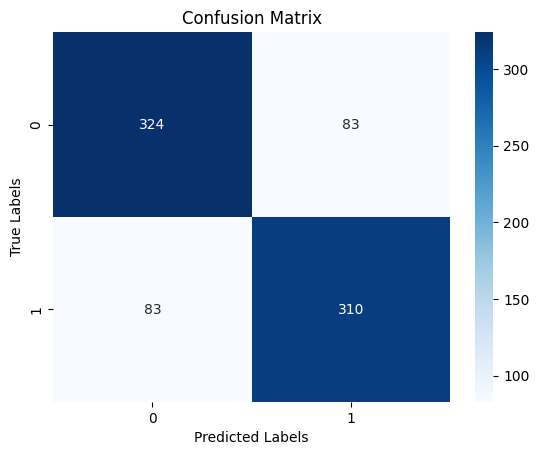

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, test_data_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


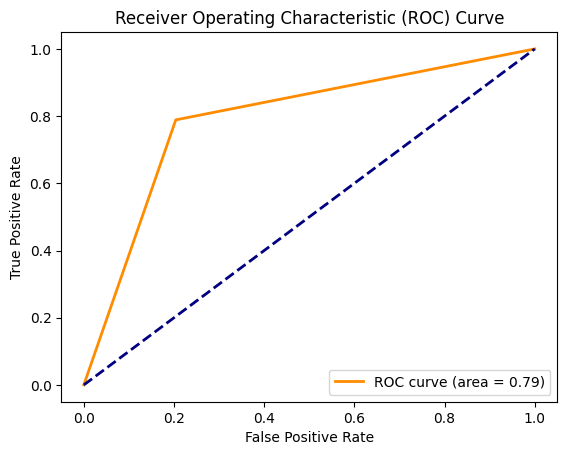

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, test_data_prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


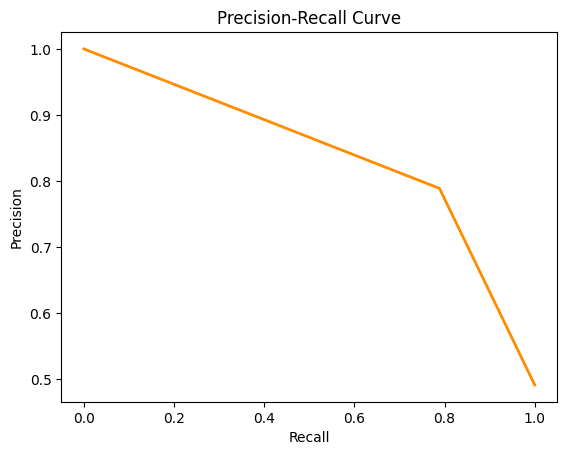

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, test_data_prediction)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
